In [1]:
%matplotlib inline
import pyaf
import datetime

In [2]:
# !wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_GOOG.csv

In [3]:

goog_link = 'https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_GOOG.csv'
    
import pandas as pd
goog_dataframe = pd.read_csv(goog_link);
goog_dataframe['Date'] = goog_dataframe['Date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
goog_dataframe.sort_values(by = 'Date' , ascending=True, inplace=True)
goog_dataframe = goog_dataframe.reset_index(drop=True)
goog_dataframe.tail()

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
1253,4,GOOG,2016-07-21,738.630005,735.830994,969100,740.359985,738.630005,741.690002
1254,3,GOOG,2016-07-22,742.739990,736.559998,1256300,741.859985,742.739990,743.239990
1255,2,GOOG,2016-07-25,739.770020,737.500000,1030700,740.669983,739.770020,742.609985
1256,1,GOOG,2016-07-26,738.419983,734.270020,1179400,739.039978,738.419983,741.690002
1257,0,GOOG,2016-07-27,741.770020,737.000000,1497100,738.280029,741.770020,744.460022


In [4]:
lDate =  goog_dataframe.Date
goog_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1258 non-null   int64         
 1   Symbol      1258 non-null   object        
 2   Date        1258 non-null   datetime64[ns]
 3   Close       1258 non-null   float64       
 4   Low         1258 non-null   float64       
 5   Volume      1258 non-null   int64         
 6   Open        1258 non-null   float64       
 7   Adj_Close   1258 non-null   float64       
 8   High        1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 88.6+ KB


In [5]:
goog_dataframe.Date.min(), goog_dataframe.Date.max() 

(Timestamp('2011-07-28 00:00:00'), Timestamp('2016-07-27 00:00:00'))

In [6]:
lHierarchy = {};
lHierarchy['Levels'] = None;
lHierarchy['Data'] = None;
lHierarchy['Groups']= {};

lHierarchy['Periods']= ["D", "W" , "2W" , "M"]

lHierarchy['Type'] = "Temporal";

INFO:pyaf.std:START_HIERARCHICAL_PLOTTING


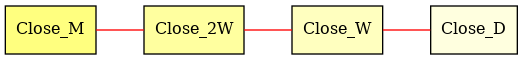

INFO:pyaf.std:END_HIERARCHICAL_PLOTTING_TIME_IN_SECONDS 0.1001594066619873


In [7]:
# create a model to plot the hierarchy.
import pyaf.HierarchicalForecastEngine as hautof
lEngine = hautof.cHierarchicalForecastEngine()

H = 14

lSignalHierarchy = lEngine.plot_Hierarchy(goog_dataframe , "Date", "Close", H, 
                                          lHierarchy, None);

In [8]:
goog_dataframe

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
0,1257,GOOG,2011-07-28,610.941019,603.001016,6240000,605.191021,305.165344,615.981027
1,1256,GOOG,2011-07-29,603.691033,603.691033,8305700,604.231014,301.543972,614.961042
2,1255,GOOG,2011-08-01,606.771021,599.181019,7961800,611.221057,303.082428,615.501085
3,1254,GOOG,2011-08-02,592.400990,591.570985,6425100,606.001054,295.904590,609.671015
4,1253,GOOG,2011-08-03,601.171059,583.630982,7680000,594.271013,300.285244,603.001016
...,...,...,...,...,...,...,...,...,...
1253,4,GOOG,2016-07-21,738.630005,735.830994,969100,740.359985,738.630005,741.690002
1254,3,GOOG,2016-07-22,742.739990,736.559998,1256300,741.859985,742.739990,743.239990
1255,2,GOOG,2016-07-25,739.770020,737.500000,1030700,740.669983,739.770020,742.609985
1256,1,GOOG,2016-07-26,738.419983,734.270020,1179400,739.039978,738.419983,741.690002


In [9]:
goog_dataframe.describe(include='all')

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
count,1258.000000,1258,1258,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
unique,NaN,1,1258,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,GOOG,2012-02-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1258,1,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2011-07-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-07-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,628.500000,NaN,NaN,696.285816,690.186479,3.605697e+06,696.447039,491.820009,702.078363
std,363.297628,NaN,NaN,168.831035,168.088283,2.526549e+06,168.945199,146.224491,169.631658
min,0.000000,NaN,NaN,490.920851,480.600832,7.900000e+03,490.030838,245.215210,495.978230
25%,314.250000,NaN,NaN,568.940062,563.376311,1.788850e+06,569.516381,347.184670,574.225972


In [10]:
# create a hierarchical model and train it
import pyaf.HierarchicalForecastEngine as hautof

lEngine = hautof.cHierarchicalForecastEngine()
lEngine.mOptions.mNbCores = 20
lDateColumn = "Date"
lSignalVar = "Close";

#
N = goog_dataframe.shape[0];
train_df = goog_dataframe

print(train_df)
lSignalHierarchy = lEngine.train(train_df , lDateColumn, lSignalVar, H, lHierarchy, None);

INFO:pyaf.std:START_HIERARCHICAL_TRAINING
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA D {'TH_D_start': {0: Timestamp('2011-07-28 00:00:00'), 1: Timestamp('2011-07-29 00:00:00'), 2: Timestamp('2011-07-30 00:00:00'), 3: Timestamp('2011-07-31 00:00:00'), 4: Timestamp('2011-08-01 00:00:00')}, 'Close': {0: 610.9410190000001, 1: 603.6910330000001, 2: 0.0, 3: 0.0, 4: 606.771021}}
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA W {'TH_W_start': {0: Timestamp('2011-07-28 00:00:00'), 1: Timestamp('2011-08-04 00:00:00'), 2: Timestamp('2011-08-11 00:00:00'), 3: Timestamp('2011-08-18 00:00:00'), 4: Timestamp('2011-08-25 00:00:00')}, 'Close': {0: 1214.6320520000002, 1: 2956.9050859999998, 2: 2794.344764, 3: 2625.184499, 4: 2587.1843790000003}}
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA 2W {'TH_2W_start': {0: Timestamp('2011-07-28 00:00:00'), 1: Timestamp('2011-08-11 00:00:00'

      Unnamed: 0 Symbol       Date       Close         Low   Volume  \
0           1257   GOOG 2011-07-28  610.941019  603.001016  6240000   
1           1256   GOOG 2011-07-29  603.691033  603.691033  8305700   
2           1255   GOOG 2011-08-01  606.771021  599.181019  7961800   
3           1254   GOOG 2011-08-02  592.400990  591.570985  6425100   
4           1253   GOOG 2011-08-03  601.171059  583.630982  7680000   
...          ...    ...        ...         ...         ...      ...   
1253           4   GOOG 2016-07-21  738.630005  735.830994   969100   
1254           3   GOOG 2016-07-22  742.739990  736.559998  1256300   
1255           2   GOOG 2016-07-25  739.770020  737.500000  1030700   
1256           1   GOOG 2016-07-26  738.419983  734.270020  1179400   
1257           0   GOOG 2016-07-27  741.770020  737.000000  1497100   

            Open   Adj_Close        High  
0     605.191021  305.165344  615.981027  
1     604.231014  301.543972  614.961042  
2     611.221057  

INFO:pyaf.std:START_TRAINING 'Close_D'
INFO:pyaf.std:START_TRAINING 'Close_W'
INFO:pyaf.std:START_TRAINING 'Close_2W'
INFO:pyaf.std:START_TRAINING 'Close_M'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_M' 4.722837448120117
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_2W' 6.009359359741211
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_W' 7.532167196273804
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_D' 9.281466722488403
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODELS_LEVEL_SIGNAL [(0, 'Close_D'), (1, 'Close_W'), (2, 'Close_2W'), (3, 'Close_M')]
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.2764472961425781
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.31020140647888184
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.35550737380981445
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.5370502471923828
INFO:pyaf.std:STRUCTURE [0, 1, 2, 3]
INFO:pyaf

In [11]:
train_df

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
0,1257,GOOG,2011-07-28,610.941019,603.001016,6240000,605.191021,305.165344,615.981027
1,1256,GOOG,2011-07-29,603.691033,603.691033,8305700,604.231014,301.543972,614.961042
2,1255,GOOG,2011-08-01,606.771021,599.181019,7961800,611.221057,303.082428,615.501085
3,1254,GOOG,2011-08-02,592.400990,591.570985,6425100,606.001054,295.904590,609.671015
4,1253,GOOG,2011-08-03,601.171059,583.630982,7680000,594.271013,300.285244,603.001016
...,...,...,...,...,...,...,...,...,...
1253,4,GOOG,2016-07-21,738.630005,735.830994,969100,740.359985,738.630005,741.690002
1254,3,GOOG,2016-07-22,742.739990,736.559998,1256300,741.859985,742.739990,743.239990
1255,2,GOOG,2016-07-25,739.770020,737.500000,1030700,740.669983,739.770020,742.609985
1256,1,GOOG,2016-07-26,738.419983,734.270020,1179400,739.039978,738.419983,741.690002


In [12]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='TH_D_start' TimeMin=2011-07-28T00:00:00.000000 TimeMax=2015-07-13T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=14
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Close_D' Length=1258  Min=490.92085099999997 Max=1220.172036  Mean=696.2858158593004 StdDev=168.76391868223206
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Close_D' Min=490.92085099999997 Max=1220.172036  Mean=696.2858158593004 StdDev=168.76391868223206
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Close_D_Lag1Trend_residue_zeroCycle_residue_NoAR' [Lag1Trend + NoCycle + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Close_D_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Close_D_Lag1Trend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Close_D_Lag1Trend_residue_zeroCycle_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0112 MAPE_Forecast=0.0123 MAPE_Test=0.0069
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0109 SMAPE

In [13]:

lForecast = lEngine.forecast(train_df, iHorizon=14)

INFO:pyaf.std:START_HIERARCHICAL_FORECASTING
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODELS_LEVEL_SIGNAL [(0, 'Close_D'), (1, 'Close_W'), (2, 'Close_2W'), (3, 'Close_M')]
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.304335355758667
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.36149024963378906
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.2780873775482178
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.534052848815918
INFO:pyaf.std:END_HIERARCHICAL_FORECAST_TIME_IN_SECONDS 0.9750015735626221


In [14]:
lForecast

,TH_D_start,Close_D,Close_D_Forecast,Date,TH_W_start,Close_W,Close_W_Forecast,TH_2W_start,Close_2W,Close_2W_Forecast,TH_M_start,Close_M,Close_M_Forecast,Close_D_BU_Forecast,Close_W_BU_Forecast,Close_2W_BU_Forecast,Close_M_BU_Forecast
0,2011-07-28,610.941019,610.941019,2011-07-28,2011-07-28,1214.632052,3292.628598,2011-07-28,1214.632052,1951.478567,2011-07-28,1214.632052,14620.049881,610.941019,610.941019,3292.628598,1951.478567
1,2011-07-29,603.691033,610.941019,2011-07-29,NaT,0.000000,0.000000,NaT,0.000000,0.000000,NaT,0.000000,0.000000,610.941019,610.941019,0.000000,0.000000
2,2011-08-01,606.771021,603.691033,2011-08-01,NaT,0.000000,0.000000,NaT,0.000000,0.000000,NaT,0.000000,0.000000,603.691033,603.691033,0.000000,0.000000
3,2011-08-02,592.400990,606.771021,2011-08-02,NaT,0.000000,0.000000,NaT,0.000000,0.000000,NaT,0.000000,0.000000,606.771021,606.771021,0.000000,0.000000
4,2011-08-03,601.171059,592.400990,2011-08-03,NaT,0.000000,0.000000,NaT,0.000000,0.000000,NaT,0.000000,0.000000,592.400990,592.400990,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,2016-08-06,NaN,741.770020,2016-08-06,NaT,NaN,0.000000,NaT,NaN,0.000000,NaT,NaN,0.000000,741.770020,741.770020,0.000000,0.000000
1268,2016-08-07,NaN,741.770020,2016-08-07,NaT,NaN,0.000000,NaT,NaN,0.000000,NaT,NaN,0.000000,741.770020,741.770020,0.000000,0.000000
1269,2016-08-08,NaN,741.770020,2016-08-08,NaT,NaN,0.000000,NaT,NaN,0.000000,NaT,NaN,0.000000,741.770020,741.770020,0.000000,0.000000
1270,2016-08-09,NaN,741.770020,2016-08-09,NaT,NaN,0.000000,NaT,NaN,0.000000,NaT,NaN,0.000000,741.770020,741.770020,0.000000,0.000000


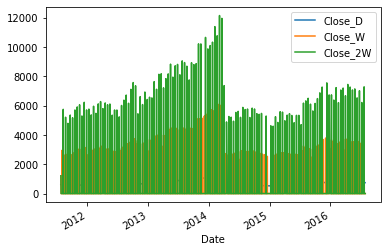

In [15]:
lForecast.plot('Date' , ['Close_D' , 'Close_W' , 'Close_2W'] )

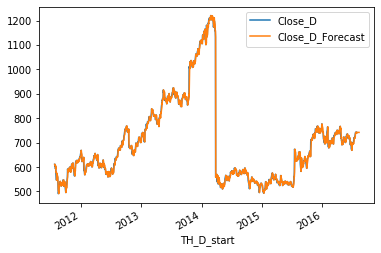

In [16]:
lForecast.plot('TH_D_start' , ['Close_D' , 'Close_D_Forecast'] )

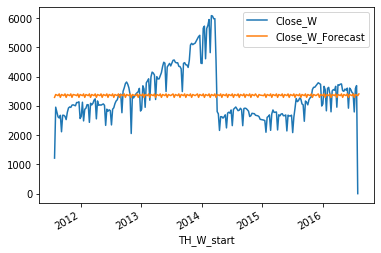

In [17]:
lForecast.plot('TH_W_start' , ['Close_W' , 'Close_W_Forecast' ,  ] )

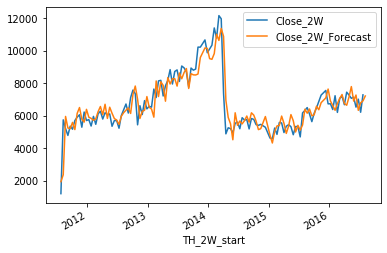

In [18]:
lForecast.plot('TH_2W_start' , ['Close_2W' , 'Close_2W_Forecast' ,  ] )

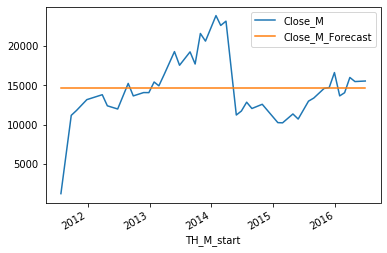

In [19]:
lForecast.plot('TH_M_start' , ['Close_M' , 'Close_M_Forecast' ,  ] )